# 최적화 (Optimize)
- 최적화? 모델이 예측한 결과 VS 실제 값의 차이 줄이기 위해 모델 수정하는 작업
- 모델의 예측값과 실제 값의 차이를 계산하는 함수 만들고, 그 값이 최소가 되는 지점 찾는 작업함

## 최적화 문제
- 함수 f(x): 손실 함수. f(x)의 반환값? 손실, 오차
- 함수 f(x)의 값을 최소화(또는 최대화)하는 변수 x의 값 찾는 것
$$
x_{i} = \arg \min_x f(x) 
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

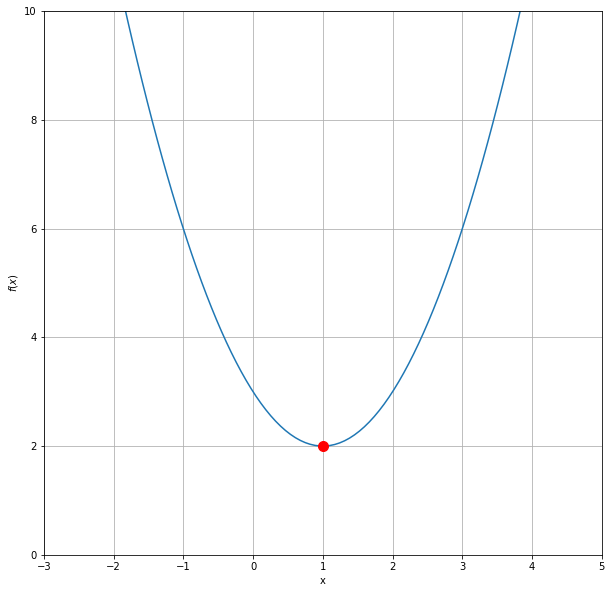

In [3]:
def loss_func(x):
    return (x-1)**2 + 2 

plt.figure(figsize=(10,10))
xx = np.linspace(-3,4, 100)
# xx.shape, f1(xx).shape
plt.plot(xx, loss_func(xx))
plt.plot(1,2, 'ro', markersize=10)
plt.ylim(0,10)
plt.xlim(-3,5)
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.grid(True)
plt.show()

### 목적함수(Object Function), 손실함수(Loss Function), 비용함수(Cost Function), 오차함수(Error Function)
- 모델의 예측한 값과 실제값 사이의 오차를 정의하는 함수
- 이 함수를 최소화하는 값을 찾는 것이 최적화의 목적

## 최적화 문제를 해결하는 방법
- 최소값 찾는 함수(공식) 탐색
- 공식을 찾을 수 없는 경우
    - feature와 sample 수가 많아질수록 계산량 급증
- 경사하강법 (Gradient Descent)    
    - 값을 조금씩 조금씩 조정해나가며 최소값 탐색

## 경사하강법 (Gradient Descent)
- 다양한 종류의 문제에서 최적의 해법 찾을 수 있는 **일반적인 최적화 알고리즘**
- 인위의 w 값(결과 보며 늘리거나 줄이면서)을 넣으며 오차 줄어들도록 조정해나가는 것
- 오차가 줄어드는 방향으로 값을 조정(크게/작게)하는 것을 자동화 -> 미분 사용
    - 미분? 순간 변화율(x가 미세하게 변화할 때, f(x)의 변화 -> 기울기
    - W 값이 변화할 때, Cost 값의 변화
    - Cost 값이 가장 작을 때(오차가 가장 작을 때) W 값 찾기
    - 임의의 w 값에서의 기울기가 양수? 더 작은 w 값 찾아야 함
    - 임의의 w 값에서의 기울기가 음수? 더 큰 w 값 찾아야 함
    - 손실함수에 대한 도함수(미분)에서 w 값 찾기(기울기가 0이 되는 w값 탐색)
- 비용함수 최소화하는 파라미터 찾기위해 반복해서 조정해나감
    - 파라미터 벡터 $W$에 대해 손실함수의 현재 gradient(경사,기울기) 계산
    - gradient가 감소하는 방향으로 벡터 $W$ 조정
    - gradient가 0이 될 때까지 반복
- W: Weight(파라미터), Cost: 오차
     - Cost가 가장 적은 W 값 찾는 것
     - Random initial value 정함 -> 노란점 지점에서 오차 가장 적음 -> w 값 찾아야 함

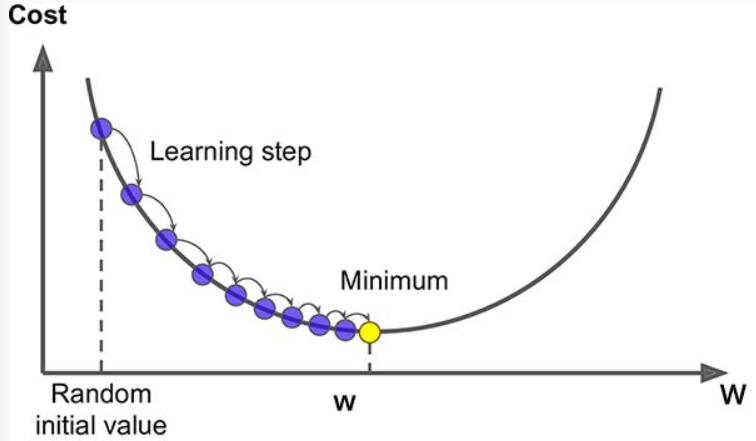

### 파라미터 조정

$$
W_{new} = W-\alpha\frac{\partial}{\partial {W}}cost(W)
$$


<center>$W$: 파라미터<br>$\alpha$:학습률<br></center> 

- 학습률 (Learning rate)
    - 기울기에 따라 이동할 step의 크기. 경사하강법 알고리즘에서 지정해야하는 하이퍼 파라미터
    - 너무 작게 잡으면, 최소값에 수렴하기 위해 많은 반복을 진행해야해 시간 오래걸림
    - 너무 크게 잡으면, 왔다갔다 하다가 오히려 더 큰 값으로 발산해 최소값에 수렴하지 못하게 됨
    - 보통 0 ~ 1 사이의 값

In [2]:
# f(x) - loss 함수(손실 함수), x - w의 역할
def f(x):
    return (x-1)**2 + 2 

In [3]:
# 함수 f의 도함수
def fd(x):
    return 2*(x-1)

In [6]:
# matplotlib 한글 설정
import matplotlib as mpl
mpl.rcParams['font.family'] = 'malgun gothic'
mpl.rcParams['axes.unicode_minus'] = False

1차시도: w=0.00, 기울기 = -2.00
2차시도: w=0.80, 기울기 = -0.40
3차시도: w=0.96, 기울기 = -0.08
4차시도: w=0.99, 기울기 = -0.02
5차시도: w=1.00, 기울기 = -0.00
6차시도: w=1.00, 기울기 = -0.00


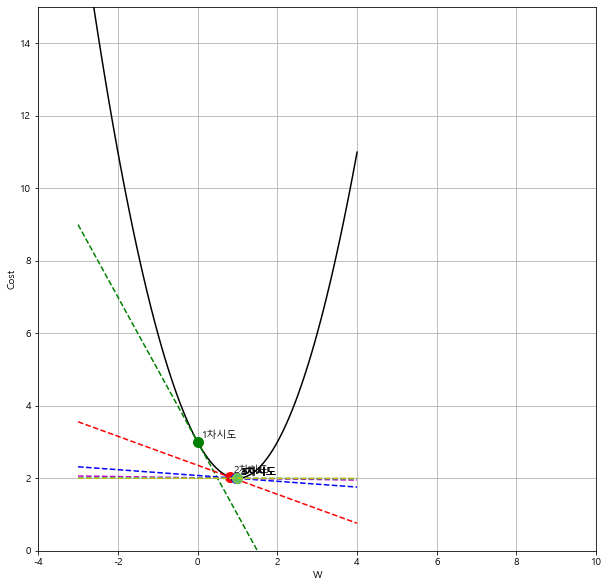

In [11]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-3,4, 100)
# y = f(X)

plt.figure(figsize=(10,10))
plt.plot(X, f(X), 'k-')

learning_rate = 0.4
# learning_rate = 0.01 
# learning_rate = 1.1

# w: 조정할 가중치
w = 0
plt.plot(w, f(w), 'go', markersize=10)  # green + 'o' 모양 마커
plt.text(w+0.1, f(w)+0.1, '1차시도')
plt.plot(X, fd(w)*(X) + f(w), 'g--')
print('1차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, fd(w)))

w = w - learning_rate*fd(w)
plt.plot(w, f(w), 'ro', markersize=10)
plt.text(w+0.1, f(w)+0.1, '2차시도')
plt.plot(X, fd(w)*(X-w) + f(w), 'r--')
print('2차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, fd(w)))

w = w - learning_rate*fd(w)
plt.plot(w, f(w), 'bo', markersize=10)
plt.text(w+0.1, f(w)+0.1, '3차시도')
plt.plot(X, fd(w)*(X-w) + f(w), 'b--')
print('3차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, fd(w)))


w = w - learning_rate*fd(w)
plt.plot(w, f(w), 'mo', markersize=10)
plt.text(w+0.1, f(w)+0.1, '4차시도')
plt.plot(X, fd(w)*(X-w) + f(w), 'm--')
print('4차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, fd(w)))


w = w - learning_rate*fd(w)
plt.plot(w, f(w), 'co', markersize=10)
plt.text(w+0.1, f(w)+0.1, '5차시도')
plt.plot(X, fd(w)*(X-w) + f(w), 'c--')
print('5차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, fd(w)))

w = w - learning_rate*fd(w)
plt.plot(w, f(w), 'yo', markersize=10, alpha=0.5)
plt.text(w+0.1, f(w)+0.1, '6차시도')
plt.plot(X, fd(w)*(X-w) + f(w), 'y--')
print('6차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, fd(w)))

plt.ylim(0,15)
plt.xlim(-4,10)
plt.xlabel('W')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [12]:
# 반복문 사용
while True:
    if fd(w) == 0:  # 기울기가 0이라면
        break
    w = w - learning_rate*fd(w)

In [13]:
w

1.0